#### COSC 311 - Homework 3
##### Logan Kelsch

MAE:	33.82
MSE:	8189.09
RMSE:	90.49


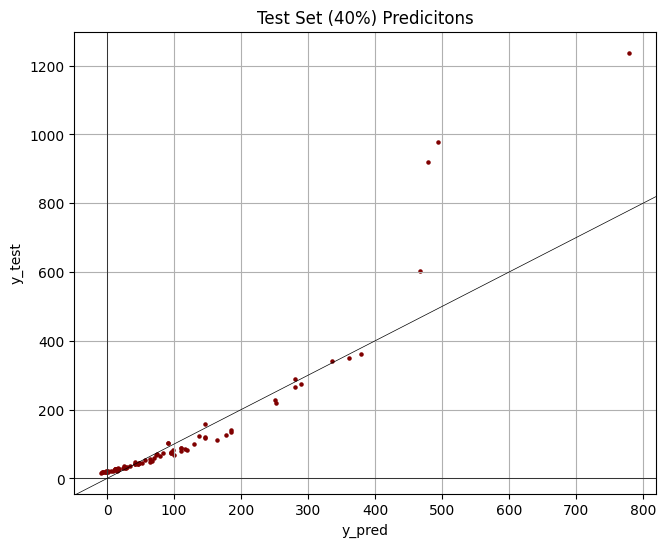

In [ ]:
'''1. Regression model for Computer Hardware Dataset'''

# DATASET:  machine.data

#import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error  #MSE
from sklearn.metrics import root_mean_squared_error #RMSE
import matplotlib.pyplot as plt
import seaborn as sns

#bring data into pddf
data = pd.read_csv('machine.data')

#using data.info(), determined all data is clean.

#drop all irrelevant features for this task
data = data.drop(columns=['VendorName','ModelName','PRP'])

#generate the correlation of all features
#    to our selected target, "ERP"
co = data.corr()['ERP'].drop('ERP')
'''-----------------------------
    OUTPUT:            ANALYSIS:
    MYCT    -0.288396  ** DROP
    MMIN     0.819292  ** #2
    MMAX     0.901202  ** #1
    CACH     0.648620  ** #3
    CHMIN    0.610580  ** #4
    CHMAX    0.592156  ** DROP
'''#---------------------------

#drop least correlated features
data = data.drop(columns=['MYCT','CHMAX'])

#separate features and target into X and y
X = data.iloc[:, :-1].values #NON 'ERP'
y = data.iloc[:, -1].values  #'ERP'

#split data into train and testing
X_train, X_test, y_train, y_test = train_test_split\
                            (X, y, test_size= 0.4, random_state=42)

#set, fit and collect predictions of linear regression model
mlr = LinearRegression()
mlr.fit(X_train,y_train)
y_pred = mlr.predict(X_test)

#metrics printout 'MAE', 'MSE', 'RMSE'
print(f'MAE:\t{mean_absolute_error(y_test,y_pred):.2f}')
print(f'MSE:\t{mean_squared_error(y_test,y_pred):.2f}')
print(f'RMSE:\t{root_mean_squared_error(y_test,y_pred):.2f}')

'''####                   ####                      ####
    This code was ripped from some of my personal code.
    The black diagonal line is the y = x line, 
                   or perfect prediction line.
'''####                   ####                      ####
plt.figure(figsize=(7.5, 6))
plt.scatter(y_pred, y_test, s=5, color='maroon')
plt.grid()
plt.axis('tight')
plt.title('Test Set (40%) Predictions')
plt.xlabel('y_pred')
plt.ylabel('y_test')
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = x_vals  # Since y = x
plt.plot(x_vals, y_vals, '-', color='black', label='y = x', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.show()